In [1]:
import numpy as np
import torch
from torch import nn, optim, autograd
from torch.nn import functional as F
from pyDOE import lhs
import scipy.io
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

from models_all import *

#Paper reproduction
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)
np.random.seed(1234)

In [2]:
PINNs1 = torch.load('../saved_model/PINNs1')
PINNs2 = torch.load('../saved_model/PINNs2')
PINNs3 = torch.load('../saved_model/PINNs3')
PINNs4 = torch.load('../saved_model/PINNs4')
PINNs5 = torch.load('../saved_model/PINNs5')

In [3]:
traindata = np.concatenate((np.linspace(0,1,200).reshape(-1,1),np.linspace(0,1,200).reshape(-1,1)),1)
x_ = traindata[:,0:1]
y_ = traindata[:,1:2]
k = 5
xx,yy = np.meshgrid(x_,y_)
data_numpy = np.concatenate((xx.reshape(-1,1),yy.reshape(-1,1)),1)
data_tensor = torch.from_numpy(data_numpy).float()

In [4]:
e1 = np.abs(torch.sin(k*data_tensor[:,0:1]).numpy()-PINNs1(data_tensor).detach().numpy())
e2 = np.abs(torch.sin(k*data_tensor[:,0:1]).numpy()-PINNs2(data_tensor).detach().numpy())
e3 = np.abs(torch.sin(k*data_tensor[:,0:1]).numpy()-PINNs3(data_tensor).detach().numpy())
e4 = np.abs(torch.sin(k*data_tensor[:,0:1]).numpy()-PINNs4(data_tensor).detach().numpy())
e5 = np.abs(torch.sin(k*data_tensor[:,0:1]).numpy()-PINNs5(data_tensor).detach().numpy())

In [5]:
e_values = [e1, e2, e3, e4, e5]
vmin=np.min(e2)
vmax=np.max(e2)

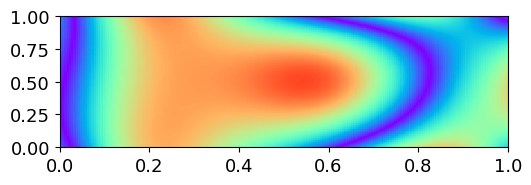

In [6]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e1.reshape(200,200), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Helmholtz_abs_loss_1.pdf',dpi=100, format='pdf',bbox_inches = 'tight')

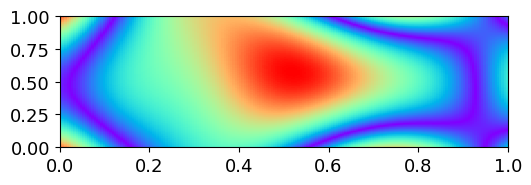

In [7]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e2.reshape(200,200), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Helmholtz_abs_loss_2.pdf',dpi=100, format='pdf',bbox_inches = 'tight')

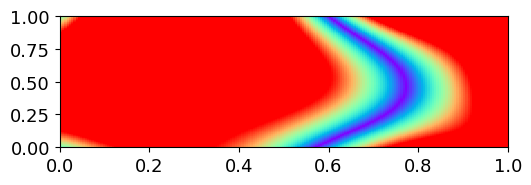

In [8]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e3.reshape(200,200), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Helmholtz_abs_loss_3.pdf',dpi=100, format='pdf',bbox_inches = 'tight')

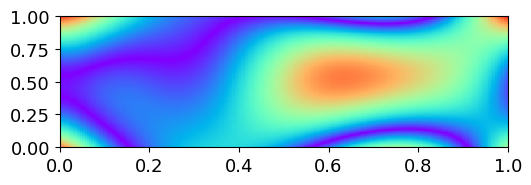

In [9]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e4.reshape(200,200), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Helmholtz_abs_loss_4.pdf',dpi=100, format='pdf',bbox_inches = 'tight')

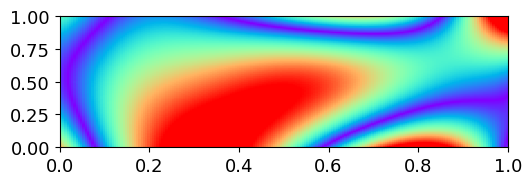

In [10]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e5.reshape(200,200), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Helmholtz_abs_loss_5.pdf',dpi=100, format='pdf',bbox_inches = 'tight')

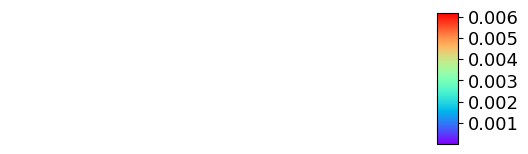

In [11]:
fig = plt.figure()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)

ax = plt.subplot(gs0[:, :])
ax.axis('off')  

h = ax.imshow(e5.reshape(200,200), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)
h.set_visible(False) 

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(h, cax=cax)
cb.ax.tick_params(labelsize=13)

ticks = [0.006,0.005,0.004,0.003,0.002,0.001]
cb.set_ticks(ticks)
cb.ax.tick_params(labelsize=13)

plt.savefig('../figures/Helmholtz_abs_loss_bar.pdf', dpi=100, format='pdf', bbox_inches='tight')